In [5]:
import numpy as np
import pandas as pd
from scipy.spatial.transform import Rotation
import seaborn as sns; sns.set(style='white', context='paper',
                               rc={'font.size': 7, 
                                   'axes.titlesize': 9,
                                   'axes.labelsize': 8,
                                   'xtick.labelsize': 7,
                                   'ytick.labelsize': 7,
                                   'legend.fontsize' : 7,
                                   'legend.markerscale': 0.7,
                                   'axes.spines.top': False,
                                   'axes.spines.right': False,
                                   'axes.linewidth': 0.4,
                                   'xtick.labelbottom': False,
                                   'ytick.labelleft': False,
                                   'figure.constrained_layout.use': True,
                                   'figure.dpi': 200})
from matplotlib import pyplot as plt

---
# Figure 1 - Effective dimensionality

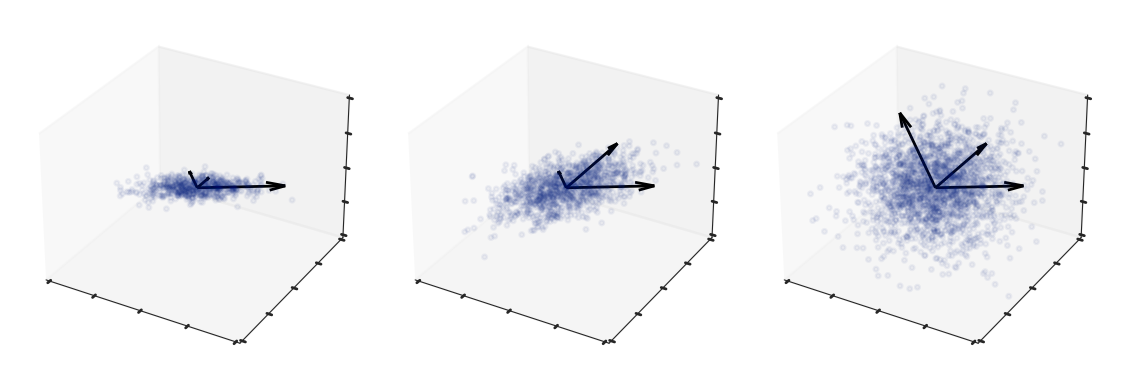

In [312]:
np.random.seed(0)

n_samples_base = 500

eigvecs = Rotation.from_euler('xyz', [0*np.pi/4, .5*np.pi/4, 0*np.pi/4]).apply(np.eye(3))
all_eigvals = np.array([[1, .05, .05],
                        [1, 1, .05], 
                        [1, 1, 1]])

fig = plt.figure(figsize=(5.5, 5.5 / len(all_eigvals)))

for i, eigvals in enumerate(all_eigvals):
    ax = fig.add_subplot(1, len(all_eigvals), i + 1, projection='3d')
    ax.set(xlim=(-1, 1), ylim=(-1, 1), zlim=(-1, 1))
    ax.grid(False)
    
    n_samples = int((4/3 * np.pi * (eigvals ** .2).prod()) * n_samples_base)
    samples = np.random.multivariate_normal(mean=[0, 0, 0], 
                                            cov=eigvecs @ np.diag(eigvals / 8) @ eigvecs.T, 
                                            size=n_samples)
    ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], s=3, c=sns.color_palette('dark').as_hex()[0], alpha=0.05)
    
    radii = eigvecs * np.sqrt(eigvals)
    ax.quiver(0, 0, 0, radii[0, 0], radii[1, 0], radii[2, 0], color='black', linewidth=1, arrow_length_ratio=0.2)
    ax.quiver(0, 0, 0, radii[0, 1], radii[1, 1], radii[2, 1], color='black', linewidth=1, arrow_length_ratio=0.2)
    ax.quiver(0, 0, 0, radii[0, 2], radii[1, 2], radii[2, 2], color='black', linewidth=1, arrow_length_ratio=0.2)

plt.savefig('saved/methods_01_ED.png', dpi=300)
plt.show()

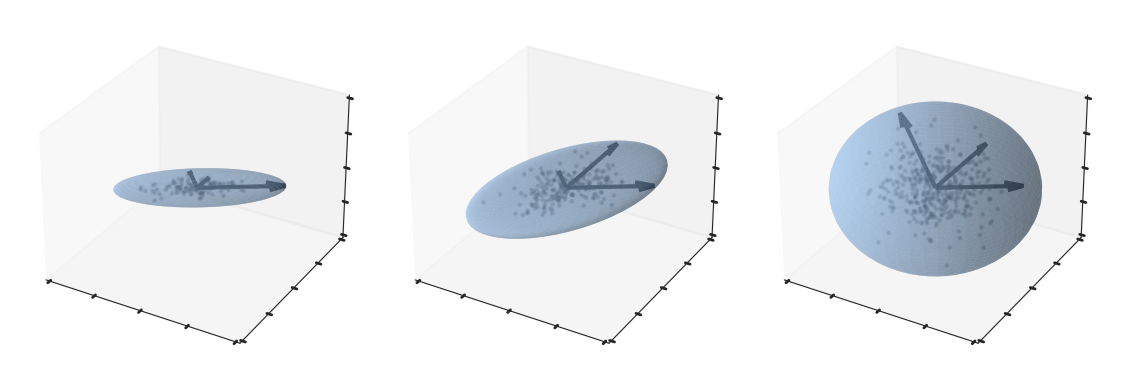

In [308]:
np.random.seed(0)

n_samples_base = 100

u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
sphere = np.stack([np.cos(u)*np.sin(v), 
                   np.sin(u)*np.sin(v), 
                   np.cos(v)])

eigvecs = Rotation.from_euler('xyz', [0*np.pi/4, .5*np.pi/4, 0*np.pi/4]).apply(np.eye(3))
all_eigvals = np.array([[1, .05, .05],
                        [1, 1, .05], 
                        [1, 1, 1]])

fig = plt.figure(figsize=(5.5, 5.5 / len(all_eigvals)))
light_c = sns.color_palette('pastel').as_hex()
dark_c = sns.color_palette('dark').as_hex()

for i, eigvals in enumerate(all_eigvals):
    ax = fig.add_subplot(1, len(all_eigvals), i + 1, projection='3d')
    ax.set(xlim=(-1, 1), ylim=(-1, 1), zlim=(-1, 1))
    ax.grid(False)
    
    n_samples = int((4/3 * np.pi * (eigvals ** .2).prod()) * n_samples_base)
    samples = np.random.multivariate_normal(mean=[0, 0, 0], 
                                            cov=eigvecs @ np.diag(eigvals / 15) @ eigvecs.T, 
                                            size=n_samples)
    ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], s=1, c='black', alpha=0.2)
    
    ellipsoid = eigvecs @ np.diag(np.sqrt(eigvals)) @ eigvecs.T @ sphere.reshape(3, -1)
    ellipsoid = ellipsoid.reshape(*sphere.shape)
    ax.plot_surface(ellipsoid[0], ellipsoid[1], ellipsoid[2], linewidth=0, alpha=0.5, color=light_c[0])
    
    radii = eigvecs * np.sqrt(eigvals)
    ax.quiver(0, 0, 0, radii[0, 0], radii[1, 0], radii[2, 0], color='black', linewidth=1.5, arrow_length_ratio=0.2)
    ax.quiver(0, 0, 0, radii[0, 1], radii[1, 1], radii[2, 1], color='black', linewidth=1.5, arrow_length_ratio=0.2)
    ax.quiver(0, 0, 0, radii[0, 2], radii[1, 2], radii[2, 2], color='black', linewidth=1.5, arrow_length_ratio=0.2)

plt.show()